# Experimentar modelos de regressão mais poderosos

## Regressão

As técnicas de aprendizado de máquina supervisionado envolvem o treinamento de um modelo para operar em um conjunto de recursos e prever um rótulo usando um conjunto de dados que inclui alguns valores de rótulo já conhecidos. O processo de treinamento ajusta os recursos aos rótulos conhecidos para definir uma função geral que pode ser aplicada a novos recursos para os quais os rótulos são desconhecidos e predizê-los. Você pode pensar nessa função assim, na qual y representa o rótulo que queremos prever e x representa os recursos que o modelo usa para prever.

<center>$$y = f([x_1, x_2, x_3, ...])$$</center>

Na maioria dos casos, x é na verdade um vetor que consiste em vários valores de recursos, então, para ser um pouco mais preciso, a função pode ser expressa assim:

<center>$$y = f([x_1, x_2, x_3, ...])$$</center>

O objetivo de treinar o modelo é encontrar uma função que realize algum tipo de cálculo para os valores de x que produza o resultado y . Fazemos isso aplicando um algoritmo de aprendizado de máquina que tenta ajustar os valores x a um cálculo que produz y razoavelmente preciso para todos os casos no conjunto de dados de treinamento.

Existem muitos algoritmos de aprendizado de máquina para aprendizado supervisionado e eles podem ser divididos em dois tipos:
<ul>
    <li><b>Algoritmos de regressão :</b> Algoritmos que preveem um valor y que é um valor numérico, como o preço de uma casa ou o número de transações de vendas.
    <li><b>Algoritmos de classificação : </b>Algoritmos que preveem a qual categoria, ou classe , uma observação pertence. O valor de y em um modelo de classificação é um vetor de valores de probabilidade entre 0 e 1, um para cada classe, indicando a probabilidade da observação pertencer a cada classe.
</ul>

Neste caderno, focaremos na regressão , usando um exemplo baseado em um estudo real no qual os dados de um esquema de compartilhamento de bicicletas foram coletados e usados para prever o número de aluguéis com base na sazonalidade e nas condições climáticas. Usaremos uma versão simplificada do conjunto de dados desse estudo.

<b><i>Citação : Os dados usados neste exercício são derivados da <a src="https://ride.capitalbikeshare.com/system-data">Capital Bikeshare</a> e são usados de acordo com o <a src="https://ride.capitalbikeshare.com/data-license-agreement">contrato de licença</a> publicado .</i></b>

## Explorar os dados

A primeira etapa em qualquer projeto de aprendizado de máquina é explorar os dados que você usará para treinar um modelo. O objetivo desta exploração é tentar entender as relações entre seus atributos; em particular, qualquer correlação aparente entre os recursos e o rótulo que seu modelo tentará prever. Isso pode exigir algum trabalho para detectar e corrigir problemas nos dados (como lidar com valores ausentes, erros ou valores discrepantes), derivar novas colunas de recursos transformando ou combinando recursos existentes (um processo conhecido como engenharia de recursos ), normalizando recursos numéricos (valores que você pode medir ou contar) para que estejam em uma escala semelhante e codificaçãocaracterísticas categóricas (valores que representam categorias discretas) como indicadores numéricos.

Vamos começar carregando os dados de compartilhamento de bicicletas como um Pandas DataFrame e visualizando as primeiras linhas.

In [17]:
import pandas as pd

#load the trainning dataset
!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
    
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()


Saved under daily-bike-share (1).csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Os dados consistem nas seguintes colunas:
<ul>
    <li>instant : um identificador de linha exclusivo
    <li>dteday : A data em que os dados foram observados - neste caso, os dados foram coletados diariamente; então há uma linha por data.
    <li>season : Um valor codificado numericamente que indica a estação (1:inverno, 2:primavera, 3:verão, 4:outono)
    <li>ano : O ano do estudo em que a observação foi feita (o estudo ocorreu ao longo de dois anos - ano 0 representa 2011 e ano 1 representa 2012)
    <li>mnth : O mês do calendário em que a observação foi feita (1:Janeiro ... 12:Dezembro)
    <li>feriado : Um valor binário que indica se a observação foi ou não feita em um feriado)
    <li>weekday : O dia da semana em que a observação foi feita (0:Domingo ... 6:Sábado)
    <li>workingday : Um valor binário que indica se o dia é ou não um dia útil (não um fim de semana ou feriado)
    <li>weathersit : Um valor categórico que indica a situação do tempo (1: claro, 2: névoa/nuvem, 3: chuva leve/neve, 4: chuva forte/granizo/neve/nevoeiro)
    <li>temp : A temperatura em celsius (normalizada)
    <li>atemp : A temperatura aparente ("semelhante") em celsius (normalizada)
    <li>hum : O nível de umidade (normalizado)
    <li>windspeed : A velocidade do vento (normalizada)
    <li>rentals: (aluguéis) O número de aluguéis de bicicletas registrados.
</ul>

Nesse conjunto de dados, rentals representa o rótulo (o valor y ) que nosso modelo deve ser treinado para prever. As outras colunas são características potenciais ( valores x ).

Conforme mencionado anteriormente, você pode realizar alguma engenharia de recursos para combinar ou derivar novos recursos. Por exemplo, vamos adicionar uma nova coluna chamada day ao dataframe extraindo o componente day da coluna dteday existente. A nova coluna representa o dia do mês de 1 a 31.

In [18]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


OK, vamos começar nossa análise dos dados examinando algumas estatísticas descritivas importantes. Podemos usar o método de descrição do dataframe para gerá-los para os recursos numéricos, bem como para a coluna de rótulos de aluguel .

In [19]:
numeric_features = ['temp','atemp','hum','windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


As estatísticas revelam algumas informações sobre a distribuição dos dados em cada um dos campos numéricos, incluindo o número de observações (são 731 registros), a média, o desvio padrão, os valores mínimo e máximo e os valores quartis (os valores limite para 25%, 50% - que também é a mediana e 75% dos dados). A partir disso, podemos ver que o número médio de aluguéis diários é em torno de 848; mas há um desvio padrão comparativamente grande, indicando muita variação no número de aluguéis por dia.

Podemos ter uma ideia mais clara da distribuição dos valores dos aluguéis visualizando os dados. Tipos de plotagem comuns para visualizar distribuições de dados numéricos são histogramas e diagramas de caixa , então vamos usar a biblioteca matplotlib do Python para criar um de cada um para a coluna de aluguel .

C:\Users\lindb\AppData\Local\Temp\ipykernel_1988\2679633085.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


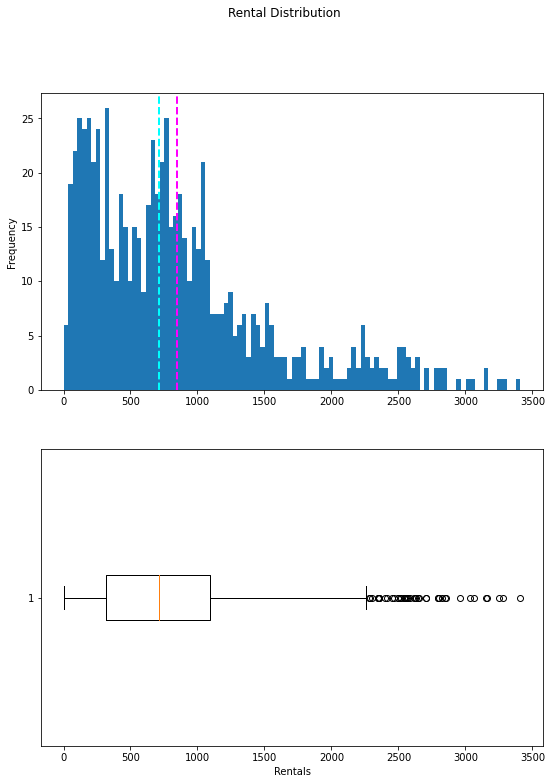

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the box plot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

#Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

Os gráficos mostram que o número de aluguéis diários varia de 0 a pouco mais de 3.400. No entanto, o número médio (e mediano) de aluguéis diários está mais próximo do limite inferior desse intervalo, com a maioria dos dados entre 0 e cerca de 2.200 aluguéis. Os poucos valores acima disso são mostrados no gráfico de caixa como pequenos círculos, indicando que são valores discrepantes - em outras palavras, valores excepcionalmente altos ou baixos além do intervalo típico da maioria dos dados.

Podemos fazer o mesmo tipo de exploração visual dos recursos numéricos. Vamos criar um histograma para cada um deles.

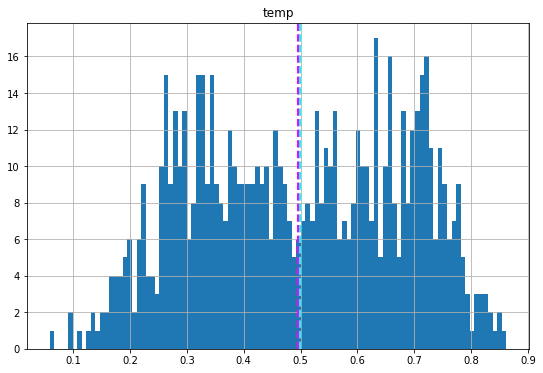

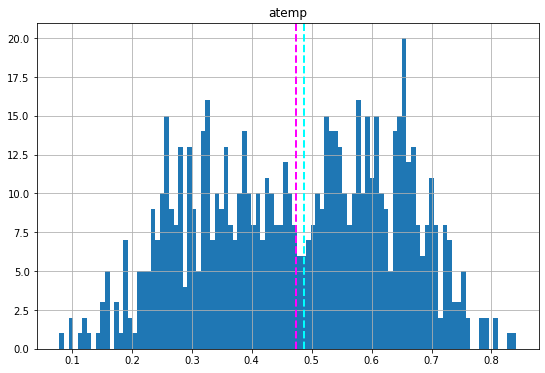

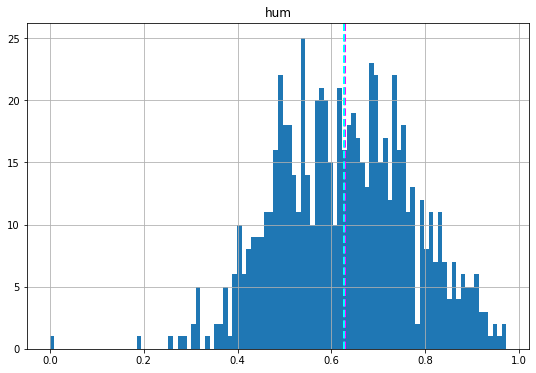

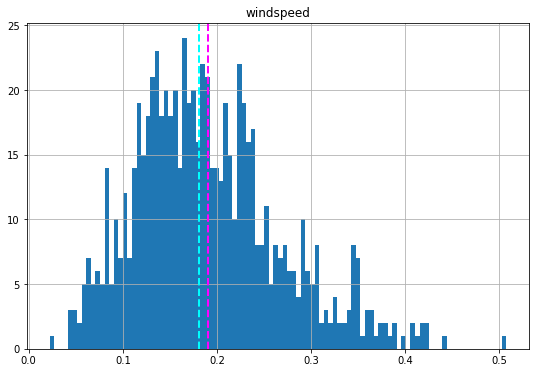

In [28]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

plt.show()

As características numéricas parecem ter uma distribuição mais normal , com a média e a mediana mais próximas do meio da faixa de valores, coincidindo com onde estão os valores mais comuns.

<i><b>Nota : As distribuições não são verdadeiramente normais no sentido estatístico, o que resultaria em um histograma suave e simétrico com a média e a moda (o valor mais comum) no centro; mas geralmente indicam que a maioria das observações tem um valor próximo ao meio.</b></i>

Exploramos a distribuição dos valores numéricos no conjunto de dados, mas e os recursos categóricos? Estes não são números contínuos em uma escala, então não podemos usar histogramas; mas podemos traçar um gráfico de barras mostrando a contagem de cada valor discreto para cada categoria.

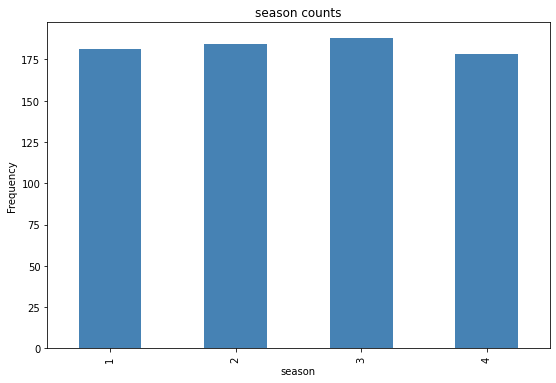

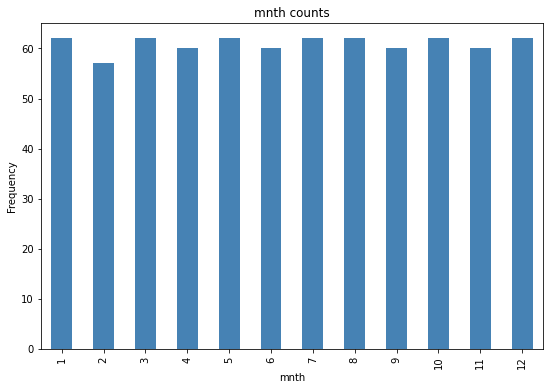

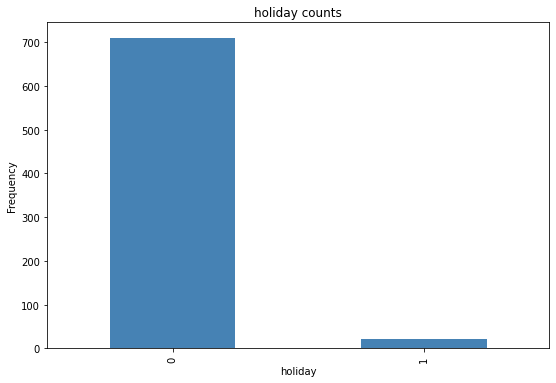

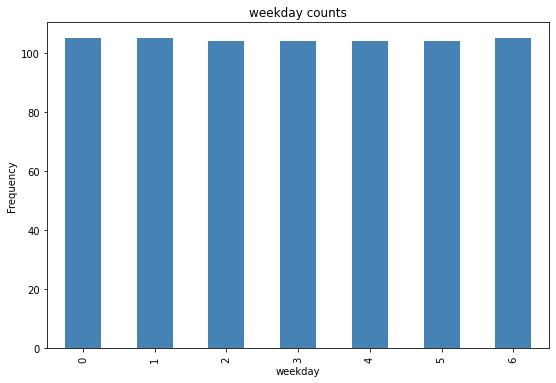

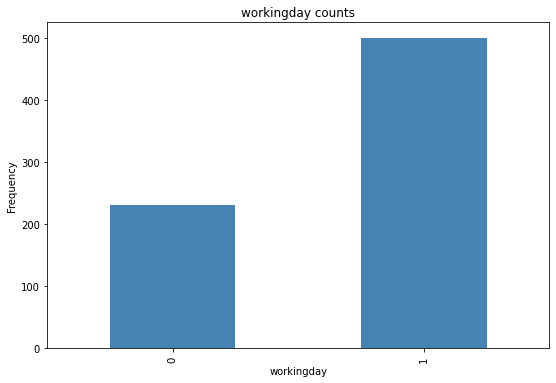

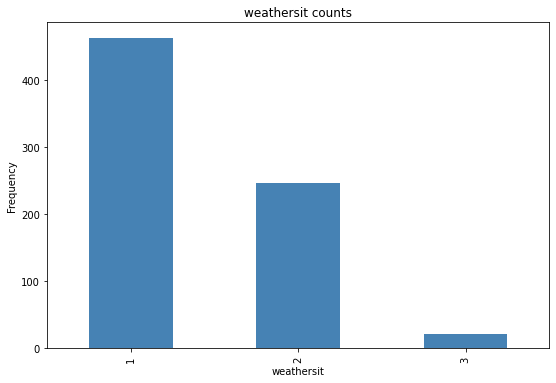

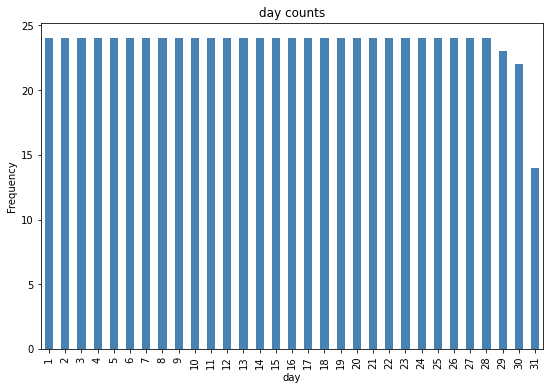

In [30]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
plt.show()

Muitos dos recursos categóricos mostram uma distribuição mais ou menos uniforme (o que significa que há aproximadamente o mesmo número de linhas para cada categoria). Exceções a isso incluem:

<ul>
<li>feriado : Há muito menos dias que são feriados do que dias que não são.
<li>dia útil : há mais dias úteis do que dias não úteis.
<li>weathersit : A maioria dos dias são da categoria 1 (claro), com a categoria 2 (névoa e nuvem) a próxima mais comum. Existem comparativamente poucos dias de categoria 3 (chuva leve ou neve) e nenhum dia de categoria 4 (chuva forte, granizo ou neblina).
</ul>

Agora que sabemos algo sobre a distribuição dos dados em nossas colunas, podemos começar a procurar relacionamentos entre os recursos e o rótulo de aluguel que queremos prever.

Para os recursos numéricos, podemos criar gráficos de dispersão que mostram a interseção dos valores do recurso e do rótulo. Também podemos calcular a estatística de correlação para quantificar a relação aparente.

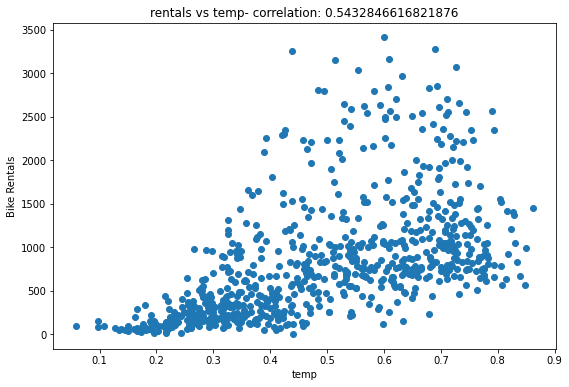

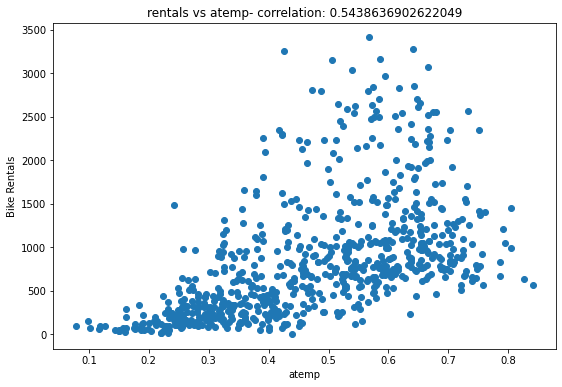

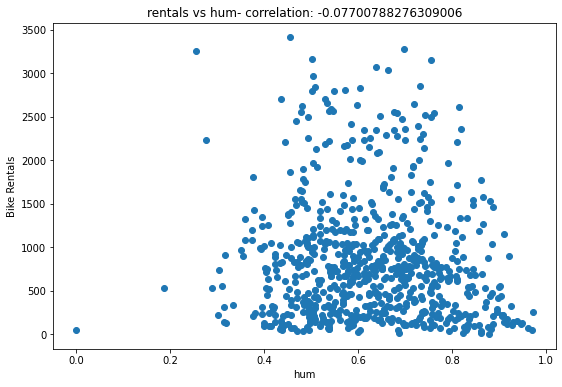

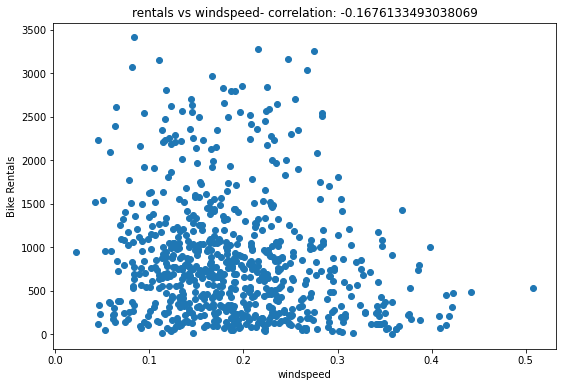

In [31]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Os resultados não são conclusivos, mas se você observar atentamente os gráficos de dispersão para temp e atemp , poderá ver uma vaga tendência diagonal mostrando que contagens de aluguel mais altas tendem a coincidir com temperaturas mais altas; e um valor de correlação de pouco mais de 0,5 para ambos os recursos suporta essa observação. Por outro lado, os gráficos de hum e windspeed mostram uma correlação ligeiramente negativa, indicando que há menos aluguéis em dias com alta umidade ou velocidade do vento.

Agora vamos comparar os recursos categóricos com o rótulo. Faremos isso criando gráficos de caixa que mostram a distribuição das contagens de aluguel para cada categoria.

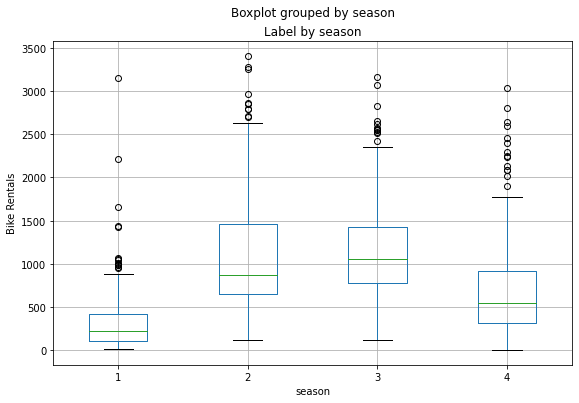

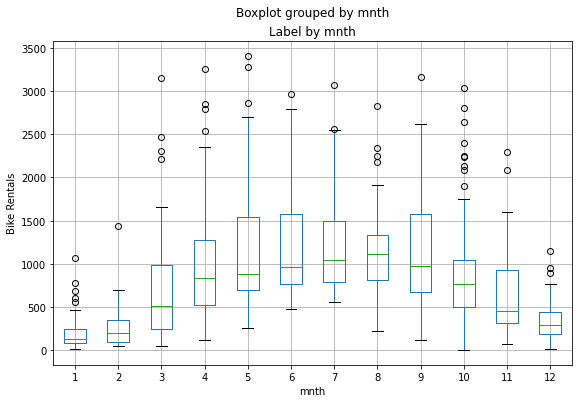

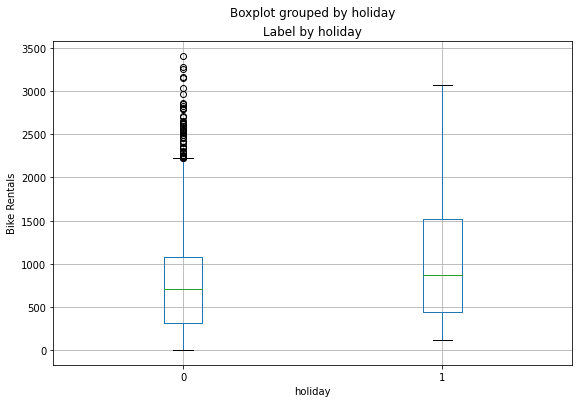

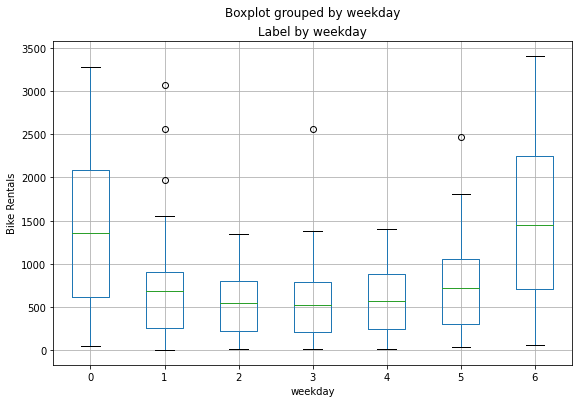

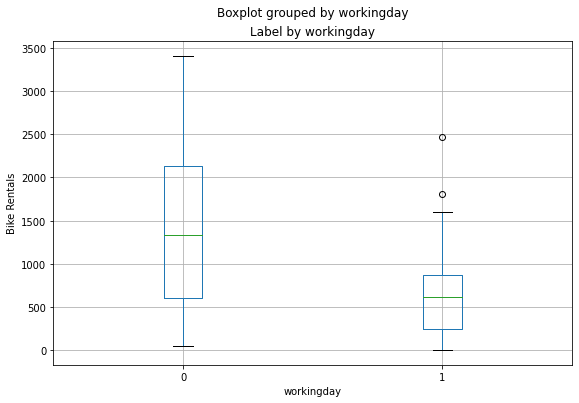

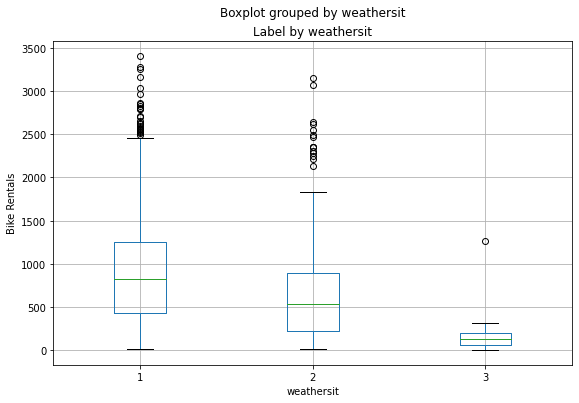

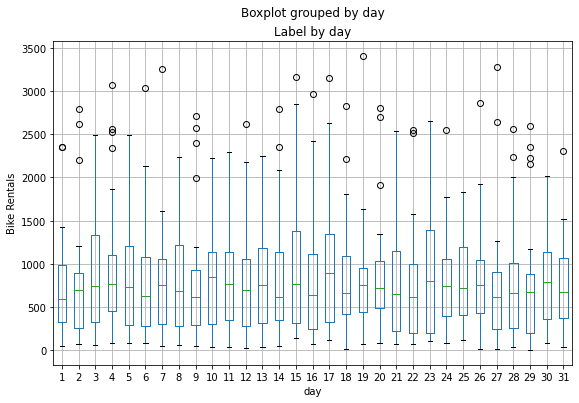

In [32]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Os gráficos mostram alguma variação na relação entre alguns valores de categoria e aluguéis. Por exemplo, há uma clara diferença na distribuição dos aluguéis nos finais de semana ( dia 0 ou 6) e durante a semana útil ( dia 1 a 5). Da mesma forma, existem diferenças notáveis para as categorias de feriados e dias úteis . Há uma tendência notável que mostra diferentes distribuições de aluguel nos meses de primavera e verão em comparação com os meses de inverno e outono. A categoria weathersit também parece fazer a diferença na distribuição de aluguel. O recurso de dia que criamos para o dia do mês mostra pouca variação, indicando que provavelmente não é preditivo do número de aluguéis.

## Treinar um modelo de regressão

Agora que exploramos os dados, é hora de usá-los para treinar um modelo de regressão que usa os recursos que identificamos como potencialmente preditivos para prever o rótulo de aluguel . A primeira coisa que precisamos fazer é separar os recursos que queremos usar para treinar o modelo do rótulo que queremos prever.

In [33]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Depois de separar o conjunto de dados, agora temos matrizes numpy chamadas X contendo os recursos e y contendo os rótulos.

Poderíamos treinar um modelo usando todos os dados; mas é prática comum no aprendizado supervisionado dividir os dados em dois subconjuntos; um conjunto (normalmente maior) com o qual treinar o modelo e um conjunto menor de "retenção" com o qual validar o modelo treinado. Isso nos permite avaliar o desempenho do modelo quando usado com o conjunto de dados de validação comparando os rótulos previstos com os rótulos conhecidos. É importante dividir os dados aleatoriamente (em vez de, digamos, pegar os primeiros 70% dos dados para treinamento e manter o restante para validação). Isso ajuda a garantir que os dois subconjuntos de dados sejam estatisticamente comparáveis (portanto, validamos o modelo com dados que possuem uma distribuição estatística semelhante aos dados nos quais foi treinado).

Para dividir os dados aleatoriamente, usaremos a função train_test_split na biblioteca scikit -learn . Essa biblioteca é um dos pacotes de aprendizado de máquina mais usados para Python.

In [37]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=59fb4ea170933932c7382bcef528168e93bf5d8156271133fbb9ab3723cf73c1
  Stored in directory: c:\users\lindb\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [38]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Agora temos os quatro conjuntos de dados a seguir:

<ul>
<li>X_train : Os valores de recursos que usaremos para treinar o modelo
<li>y_train : Os rótulos correspondentes que usaremos para treinar o modelo
<li>X_test : Os valores de recursos que usaremos para validar o modelo
<li>y_test : Os rótulos correspondentes que usaremos para validar o modelo
</ul>

Agora estamos prontos para treinar um modelo ajustando um algoritmo de regressão adequado aos dados de treinamento. Usaremos um algoritmo de regressão linear , um ponto de partida comum para regressão que funciona tentando encontrar uma relação linear entre os valores de X e o rótulo y . O modelo resultante é uma função que define conceitualmente uma linha onde todas as combinações possíveis de valores X e y se cruzam.

No Scikit-Learn, os algoritmos de treinamento são encapsulados em estimadores e, neste caso, usaremos o estimador LinearRegression para treinar um modelo de regressão linear.

In [39]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


## Avalie o Modelo Treinado

Agora que treinamos o modelo, podemos usá-lo para prever contagens de aluguel para os recursos que retivemos em nosso conjunto de dados de validação. Em seguida, podemos comparar essas previsões com os valores reais do rótulo para avaliar quão bem (ou não!) o modelo está funcionando.

In [40]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparar cada previsão com seu valor real de "verdade real" correspondente não é uma maneira muito eficiente de determinar quão bem o modelo está prevendo. Vamos ver se conseguimos uma indicação melhor visualizando um gráfico de dispersão que compara as previsões com os rótulos reais. Também sobreporemos uma linha de tendência para ter uma noção geral de quão bem os rótulos previstos se alinham com os rótulos verdadeiros.

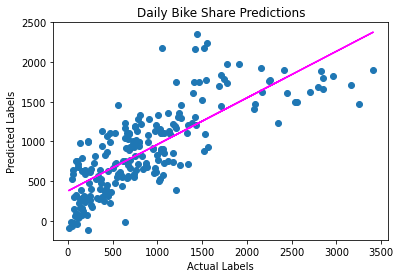

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Há uma tendência diagonal definida e as interseções dos valores previstos e reais geralmente seguem o caminho da linha de tendência; mas há uma boa diferença entre a função ideal representada pela linha e os resultados. Essa variância representa os resíduos do modelo - em outras palavras, a diferença entre o rótulo previsto quando o modelo aplica os coeficientes aprendidos durante o treinamento aos dados de validação e o valor real do rótulo de validação. Esses resíduos quando avaliados a partir dos dados de validação indicam o nível de erro esperado quando o modelo é usado com novos dados para os quais o rótulo é desconhecido.

Você pode quantificar os resíduos calculando uma série de métricas de avaliação comumente usadas. Vamos nos concentrar nos três seguintes:

<ul>
<li>Erro Quadrado Médio (MSE) : A média das diferenças quadradas entre os valores previstos e reais. Isso produz uma métrica relativa na qual quanto menor o valor, melhor o ajuste do modelo
<li>Erro de raiz quadrada média (RMSE) : A raiz quadrada do MSE. Isso gera uma métrica absoluta na mesma unidade da etiqueta (neste caso, números de aluguéis). Quanto menor o valor, melhor o modelo (em sentido simplista, representa o número médio de aluguéis pelos quais as previsões estão erradas!)
<li>Coeficiente de Determinação (geralmente conhecido como R-quadrado ou R2 ): Uma métrica relativa em que quanto maior o valor, melhor o ajuste do modelo. Em essência, essa métrica representa quanto da variação entre os valores de rótulo previstos e reais o modelo é capaz de explicar.
</ul>
 
<b><i>Observação : você pode descobrir mais sobre essas e outras métricas para avaliar modelos de regressão na <a src="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">documentação do Scikit-Learn</a></i></b>

Vamos usar o Scikit-Learn para calcular essas métricas para nosso modelo, com base nas previsões que ele gerou para os dados de validação.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035598
RMSE: 449.41357285951653
R2: 0.604045473691919


Portanto, agora quantificamos a capacidade do nosso modelo de prever o número de aluguéis. Definitivamente tem algum poder preditivo, mas provavelmente podemos fazer melhor!



# Resumo

Aqui exploramos nossos dados e ajustamos um modelo básico de regressão. No próximo notebook, tentaremos vários outros algoritmos de regressão para melhorar o desempenho



# Leitura adicional

Para saber mais sobre o Scikit-Learn, consulte a documentação do <b><a src="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">Scikit-Learn</a></b> .